In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

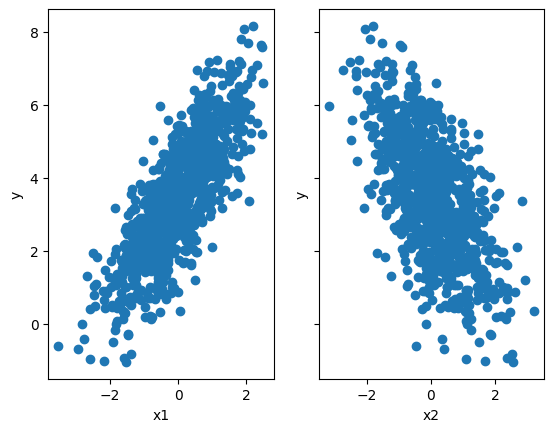

In [3]:
torch.manual_seed(21)

num_sample = 1000

x = torch.randn(num_sample, 2)  #create random fearure with 2 dimension

true_weight = torch.tensor([1.3, -1])
true_bias = torch.tensor([3.5])

y = x @ true_weight.T + true_bias   #target variable

#plot the dataset

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)

ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x2')
ax[1].set_ylabel('y')

plt.show()






Loss Function :

$$J = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

implemantation of Gradient descent algorithm

$$Param = Param - \gamma \cdot \frac{\partial J}{\partial Param}$$

Epoch [100/1000], Loss: 1.3191864490509033
Epoch [200/1000], Loss: 0.9611146450042725
Epoch [300/1000], Loss: 0.9569917321205139
Epoch [400/1000], Loss: 0.9569010734558105
Epoch [500/1000], Loss: 0.9568983316421509
Epoch [600/1000], Loss: 0.9568982124328613
Epoch [700/1000], Loss: 0.9568980932235718
Epoch [800/1000], Loss: 0.9568980932235718
Epoch [900/1000], Loss: 0.9568980932235718
Epoch [1000/1000], Loss: 0.9568980932235718
Final weight: 3.1199302673339844, Final bias: 4.131556510925293


Text(0.5, 1.0, 'bias vs loss - Gradient Descent')

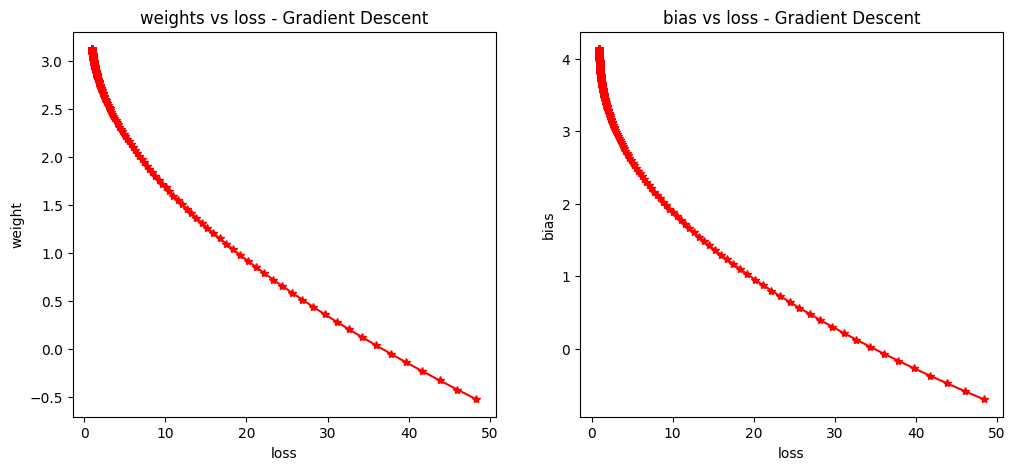

In [26]:
import torch
import torch.nn as nn

# Define the model
class LinearRegression(nn.Module):  # Inherit from nn.Module
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()  # Initialize nn.Module
        self.linear = nn.Linear(input_size, output_size)  # Linear layer

    # Forward pass
    def forward(self, x):
        return self.linear(x)  # Use linear layer to compute output

# Initialize the model
model = LinearRegression(1, 1)  # For 1 input feature, 1 output

# Define learning rate and number of epochs
learning_rate = 0.01
num_epoch = 1000

# Sample data (replace with actual data)
x = torch.randn(100, 1)  # 100 samples, 1 feature
y = 3 * x + 4 + torch.randn(100, 1)  # y = 3x + 4 with some noise

weights = []
biases = []
losses = []

# Define Mean Squared Error function
def MSE(y_p, y):
    return ((y_p - y) ** 2).mean()  # Mean Squared Error

# Gradient Descent from scratch
for epoch in range(num_epoch):
    # Forward pass: Compute predictions
    y_p = model(x)

    # Compute loss
    loss = MSE(y_p, y)

    # Backward pass: Compute gradients
    loss.backward()

    # Update parameters manually using gradient descent
    with torch.no_grad():  # Disable gradient tracking for this operation
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating to prevent accumulation
    model.zero_grad()

    weights.append(model.linear.weight.item())  # Append current weight
    biases.append(model.linear.bias.item())     # Append current bias
    losses.append(loss.item())                  # Append current loss


    # Print the loss every 100 epochs for tracking
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item()}')

# Check the final weight and bias after training
print(f'Final weight: {model.linear.weight.item()}, Final bias: {model.linear.bias.item()}')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses, weights,'r*-', label = 'weight vs loss')
plt.ylabel('weight')
plt.xlabel('loss')
plt.title('weights vs loss - Gradient Descent')

plt.subplot(1,2,2)
plt.plot(losses, biases,'r*-', label = 'bias vs loss')
plt.ylabel('bias')
plt.xlabel('loss')
plt.title('bias vs loss - Gradient Descent')

